In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("10th_class_students_data.csv")
df.head()

,SL NO,GENDER,HIN,ENG,MATH,GEO,HIST,SCIENCE,BIO,HOBBY,INTEREST,SPORTS,ACHIEVEMENTS,LANGUAGE,AVG,STREAM
0,205,Female,100,85,58,80,93,45,51,Cooking,Music,Basketball,Math Olympiad winner,Hindi,73.142857,Arts
1,307,Female,94,86,59,92,76,52,42,Gardening,History,Football,Music competition winner,Hindi,71.571429,Arts
2,403,Female,97,64,58,86,86,54,54,Cooking,Photography,Tennis,Dance competition winner,Hindi,71.285714,Arts
3,1618,Female,83,91,49,86,95,51,43,Gardening,Cooking,Swimming,Math Olympiad winner,English,71.142857,Arts
4,1745,Female,83,96,52,95,79,43,46,Sports,Music,Football,Chess competition winner,English,70.571429,Arts


In [ ]:
df['STREAM'].value_counts()

STREAM
Commerce      250
Humanities    250
Science       250
Sports        250
Arts          174
Name: count, dtype: int64

### Read the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Freelancing/Client5_Career_Recommendation/10th_class_students_data.csv")
df.head()

,SL NO,GENDER,HIN,ENG,MATH,GEO,HIST,SCIENCE,BIO,HOBBY,INTEREST,SPORTS,ACHIEVEMENTS,LANGUAGE,AVG,STREAM
0,205,Female,100,85,58,80,93,45,51,Cooking,Music,Basketball,Math Olympiad winner,Hindi,73.142857,Arts
1,307,Female,94,86,59,92,76,52,42,Gardening,History,Football,Music competition winner,Hindi,71.571429,Arts
2,403,Female,97,64,58,86,86,54,54,Cooking,Photography,Tennis,Dance competition winner,Hindi,71.285714,Arts
3,1618,Female,83,91,49,86,95,51,43,Gardening,Cooking,Swimming,Math Olympiad winner,English,71.142857,Arts
4,1745,Female,83,96,52,95,79,43,46,Sports,Music,Football,Chess competition winner,English,70.571429,Arts


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

le = LabelEncoder()
# Label encoding for 'GENDER', 'HOBBY', 'INTEREST', 'SPORTS', 'ACHIEVEMENTS', 'LANGUAGE'
df[['GENDER', 'HOBBY', 'INTEREST', 'SPORTS', 'ACHIEVEMENTS', 'LANGUAGE']] = df[['GENDER', 'HOBBY', 'INTEREST', 'SPORTS', 'ACHIEVEMENTS', 'LANGUAGE']].apply(le.fit_transform)

# Splitting the data into features and target variable
X = df.drop(['SL NO', 'STREAM'], axis=1)  # Features
y = df['STREAM']  # Target variable

# Splitting the data into training and testing sets with equal distribution of classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

print("Train data size: {} and Test data size:{}".format(X_train.shape,X_test.shape))

Train data size: (939, 14) and Test data size:(235, 14)


In [ ]:
le.classes_

array(['English', 'Hindi'], dtype=object)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

# Ridge Classifier with Polynomial Features
#model = make_pipeline(PolynomialFeatures(degree=3), RidgeClassifier())

ten_model = RandomForestClassifier()

# Fit the model
ten_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Accuracy before tuning
y_pred = ten_model.predict(X_test)
accuracy_before_tuning = accuracy_score(y_test, y_pred)
print(f"Accuracy before tuning: {accuracy_before_tuning:.2f}")

Accuracy before tuning: 0.96


In [ ]:
# Get probabilities
probabilities = ten_model.predict_proba(X_test)
probabilities

array([[0.  , 0.06, 0.04, 0.23, 0.67],
       [0.  , 0.06, 0.  , 0.21, 0.73],
       [0.01, 0.14, 0.01, 0.42, 0.42],
       ...,
       [0.  , 0.04, 0.  , 0.16, 0.8 ],
       [0.02, 0.08, 0.  , 0.19, 0.71],
       [0.06, 0.06, 0.86, 0.  , 0.02]])

In [ ]:
# Making predictions
y_pred_train = ten_model.predict(X_train)
y_pred_test = ten_model.predict(X_test)

# Model evaluation
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9574468085106383


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Classification report
print("\nClassification Report:")
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

        Arts       0.97      1.00      0.99        35
    Commerce       0.96      0.88      0.92        50
  Humanities       1.00      1.00      1.00        50
     Science       0.90      0.92      0.91        50
      Sports       0.96      1.00      0.98        50

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235


Confusion Matrix:
[[35  0  0  0  0]
 [ 1 44  0  5  0]
 [ 0  0 50  0  0]
 [ 0  2  0 46  2]
 [ 0  0  0  0 50]]


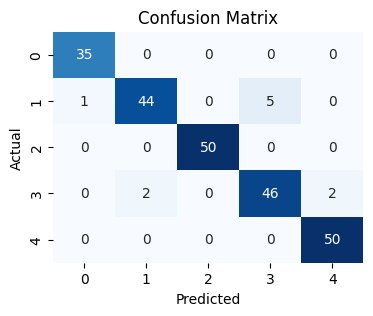

In [ ]:
# Heatmap for confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision and recall scores
precision = []
recall = []
for key, value in classification_rep.items():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        precision.append(value['precision'])
        recall.append(value['recall'])

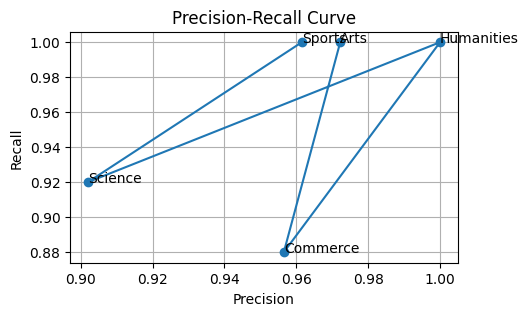

In [ ]:
# Precision-Recall Plot
plt.figure(figsize=(5, 3))
plt.plot(precision, recall, marker='o', linestyle='-')
for i, txt in enumerate(classification_rep.keys()):
    if txt not in ['accuracy', 'macro avg', 'weighted avg']:
        plt.annotate(txt, (precision[i], recall[i]))
plt.title('Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

### Save the 10th class model

In [ ]:
import sklearn
python.__version__

NameError: name 'python' is not defined

In [ ]:
import joblib

# Assuming your model object is named "model"
# and you want to save it as "model.pkl"
joblib.dump(ten_model, '/content/drive/MyDrive/Freelancing/Client5_Career_Recommendation/ten_model.pkl')

['/content/drive/MyDrive/Freelancing/Client5_Career_Recommendation/ten_model.pkl']

In [ ]:
ten_model

RandomForestClassifier()

In [ ]:
df.tail(2)

,SL NO,GENDER,HIN,ENG,MATH,GEO,HIST,SCIENCE,BIO,HOBBY,INTEREST,SPORTS,ACHIEVEMENTS,LANGUAGE,AVG,STREAM
1172,14964,1,81,52,46,47,89,58,67,6,4,2,7,1,62.857143,Sports
1173,69906,1,87,95,53,96,79,62,91,6,3,5,2,1,80.428571,Sports


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import normalize

In [ ]:
df.columns

Index(['SL NO', 'GENDER', 'HIN', 'ENG', 'MATH', 'GEO', 'HIST', 'SCIENCE',
       'BIO', 'HOBBY', 'INTEREST', 'SPORTS', 'ACHIEVEMENTS', 'LANGUAGE', 'AVG',
       'STREAM'],
      dtype='object')

In [ ]:
df.head(1)

,SL NO,GENDER,HIN,ENG,MATH,GEO,HIST,SCIENCE,BIO,HOBBY,INTEREST,SPORTS,ACHIEVEMENTS,LANGUAGE,AVG,STREAM
0,205,0,100,85,58,80,93,45,51,0,4,1,5,1,73.142857,Arts


In [ ]:
LANGUAGE = "Hindi"
if LANGUAGE == "Hindi":
  LANGUAGE = 1
elif LANGUAGE == "English":
  LANGUAGE = 0


In [ ]:
data_balanced['LANGUAGE'].value_counts()

LANGUAGE
Hindi      595
English    579
Name: count, dtype: int64

In [ ]:
df['LANGUAGE'].value_counts()

LANGUAGE
1    595
0    579
Name: count, dtype: int64

In [ ]:
# Load the model
model = joblib.load('/content/drive/MyDrive/Freelancing/Client5_Career_Recommendation/ten_model.pkl')

GENDER = "Male"

if GENDER.upper() == "MALE":
  GENDER = 1
else:
  GENDER = 0
HIN = 100
ENG = 77
MATH = 52
GEO = 89
HIST = 56
SCIENCE = 50
BIO = 56

HOBBY = "Sports"
if HOBBY == "Sports":
  HOBBY = 6
elif HOBBY == "Gardening":
  HOBBY = 2
elif HOBBY == "Music":
  HOBBY = 3
elif HOBBY == "Cooking":
  HOBBY = 0
elif HOBBY == "Photography":
  HOBBY = 4
elif HOBBY == "Drawing":
  HOBBY = 1
elif HOBBY == "Reading":
  HOBBY = 5
elif HOBBY == "Travelling":
  HOBBY = 7


INTEREST = "Music"
if INTEREST == "Music":
  INTEREST = 4
elif INTEREST == "History":
  INTEREST = 3
elif INTEREST == "Cooking":
  INTEREST = 1
elif INTEREST == "Programming":
  INTEREST = 6
elif INTEREST == "Art":
  INTEREST = 0
elif INTEREST == "Dance":
  INTEREST = 2
elif INTEREST == "Photography":
  INTEREST = 5
elif INTEREST == "Science":
  INTEREST = 7

SPORTS = "Swimming"
if SPORTS == "Swimming":
  SPORTS = 4
elif SPORTS == "Table Tennis":
  SPORTS = 5
elif SPORTS == "Tennis":
  SPORTS = 6
elif SPORTS == "Volleyball":
  SPORTS = 7
elif SPORTS == "Basketball":
  SPORTS = 1
elif SPORTS == "Football":
  SPORTS = 3
elif SPORTS == "Cricket":
  SPORTS = 2
elif SPORTS == "Athletics":
  SPORTS = 0

ACHIEVEMENTS = "Dance competition winner"
if ACHIEVEMENTS == "Dance competition winner":
  ACHIEVEMENTS = 3
elif ACHIEVEMENTS == "Chess competition winner":
  ACHIEVEMENTS = 2
elif ACHIEVEMENTS == "Math Olympiad winner":
  ACHIEVEMENTS = 5
elif ACHIEVEMENTS == "Music competition winner":
  ACHIEVEMENTS = 6
elif ACHIEVEMENTS == "Debate competition winner":
  ACHIEVEMENTS = 4
elif ACHIEVEMENTS == "Art competition winner":
  ACHIEVEMENTS = 0
elif ACHIEVEMENTS == "Science fair winner ":
  ACHIEVEMENTS = 7
elif ACHIEVEMENTS == "Athletics competition winner":
  ACHIEVEMENTS = 1

LANGUAGE = "Hindi"
if LANGUAGE == "Hindi":
  LANGUAGE = 1
elif LANGUAGE == "English":
  LANGUAGE = 0


AVG = np.average([HIN,ENG,MATH,GEO,HIST,SCIENCE,BIO])

new_data = np.array([GENDER,HIN,ENG,MATH,GEO,HIST,SCIENCE,BIO,HOBBY,INTEREST,SPORTS,ACHIEVEMENTS,LANGUAGE, AVG]).reshape(1,-1)

#test_data = df.iloc[-41].values[1:-1].reshape(1, -1)
# Make predictions
# Assuming you have new_data for which you want to make predictions
predictions = model.predict(new_data)
# Printing the predictions
print(predictions)

# Predict probabilities
probabilities = model.predict_proba(new_data)
probabilities

['Humanities']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.1 , 0.05, 0.8 , 0.  , 0.05]])

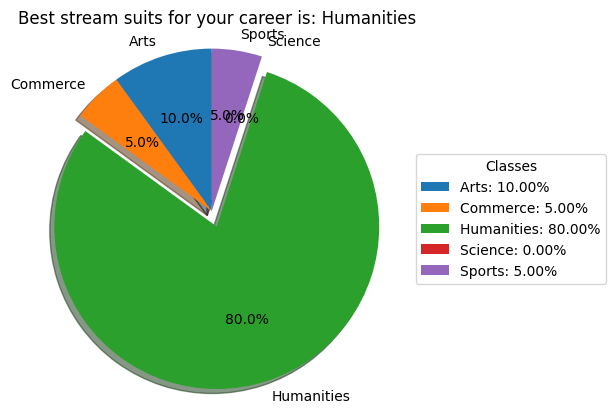

In [ ]:
# Pie chart
labels = model.classes_
sizes = probabilities[0] *100  # Probabilities for the first sample, change index as needed

# Encode classes along with probabilities
encoded_classes = [f"{label}: {size:.2f}%" for label, size in zip(labels, sizes)]

explode = [0.1 if p == max(sizes) else 0 for p in sizes]  # "explode" the largest slice
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# Adjust the layout
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.6)
plt.title("Best stream suits for your career is: {}".format(predictions[0]))
# Move the legend outside the pie chart
plt.legend(wedges, encoded_classes, title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [ ]:
# Sort by sizes
sorted_indices = np.argsort(sizes)[::-1]
sorted_labels = [labels[i] for i in sorted_indices]
sorted_sizes = sizes[sorted_indices]
sorted_encoded_classes = [encoded_classes[i] for i in sorted_indices]

# Create a DataFrame
df_recomd = pd.DataFrame({"Class": sorted_labels, "Probability": sorted_sizes})

# Print the table
print(df_recomd)

        Class  Probability
0  Humanities         80.0
1        Arts         10.0
2      Sports          5.0
3    Commerce          5.0
4     Science          0.0


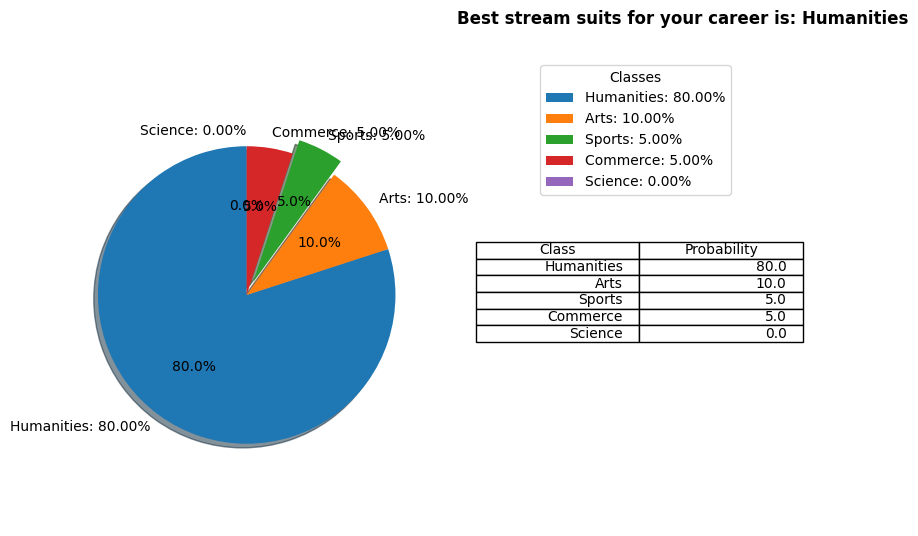

In [ ]:
# Plotting the data
explode = [0.1 if p == max(sizes) else 0 for p in sizes]  # "explode" the largest slice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Increase the figure size
fig.suptitle("Best stream suits for your career is: {}".format(predictions[0]), fontsize=12, fontweight='bold', y=0.96)

# Pie Chart
wedges, _, autotexts = ax1.pie(sorted_sizes, explode=explode, labels=sorted_encoded_classes, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# Adjust the layout
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.6)


# Move the legend outside the pie chart
ax1.legend(wedges, sorted_encoded_classes, title="Classes", loc="upper right", bbox_to_anchor=(1, 0.5, 1, 0.5))

# Plot the table
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=df_recomd.values, colLabels=df_recomd.columns, loc='center')
# Save the plot as an image
plt.savefig('plot_image.png', bbox_inches='tight')  # Save the plot as an image
plt.show()